# Johdatus peliteoriaan ja NashPy-kirjastoon

Peliteoria tutkii toimijoiden välistä strategista vuorovaikutusta. Tässä siis kyse on vuorovaikutuksesta, jossa osapuolet pyrkivät tekemään sen, mikä on heidän kannaltaan parasta.

Tutustutaan asiaan lähemmin [Kivi, paperi ja sakset](https://fi.wikipedia.org/wiki/Kivi,_paperi_ja_sakset) -pelin kautta. Tässä pelissä kaksi pelaajaa valitsee yhden kolmesta vaihtoehdosta. Peliteoriassa vaihtoehtoja kutsutaan strategioiksi:

* Kivi
* Paperit
* Sakset

Voittaja valikoituu seuraavasti:

* Kivi hajottaa sakset
* Paperi peittää kiven
* Sakset leikkaavat paperia.

Tämä voidaan esittää matemaattisesti 3 x 3 -matriisilla

$$
A =
\begin{pmatrix}
0 & -1 & 1\\
1 & 0 & -1\\
-1 & 1 & 0
\end{pmatrix}
$$


Matriisin solu $A_{ij}$ näyttää hyödyn pelaajalle, joka pelaa rivejä ja valitsee rivin $i$ vastustajan pelatessa sarakkeita ja valitessa sarakkeen $j$. Jos siis esimerkiksi rivipelaaja valitsee sakset eli kolmosstrategian ja sarakepelaaja valitsee paperin eli kakkosstrategian, rivipelaajan hyöty on $A_{32}=1$, sillä sakset leikkaavat paperia.

## NashPy-kirjaston asentaminen

Tutustutaan peliin tarkemmin Pythonin NashPy-kirjaston avulla. Se pitää ensin asentaa:
* Mac tai Linux: terminaalin kautta
* Windows: Anaconda Prompt tai vastaava

ja ajamalla komento $$\textrm{pip install nashpy}$$

In [1]:
!pip install nashpy

In [2]:
# Tuodaan kirjastot
import nashpy as nash
import numpy as np

## Pelin luominen

Luodaan edellä kuvattu Kivi, paperi, sakset -peli NashPyllä:

In [3]:
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
rps = nash.Game(A)
rps

Zero sum game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]

Tuloste sisältää myös hyödyllistä inofrmaatiota pelistä. Tässä tapauksessa se näyttää myös sarakepelaajan hyödyn. Sarakepelaajan hyöty on tässä tapauksessa matriisi $-A$, mutta näin ei yleisesti aina ole.

On myös mahdollista sisällyttää matriisipari pelin luokkaan. Näin saadaan tässä tapauksessa sama peli.

In [4]:
B = -A
rps = nash.Game(A, B)
rps

Zero sum game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]

Tuloksena tässä on siis sama peli kuin se, jossa syötteenä oli vain yksi matriisi. NashPy olettaa, että peli on _nollasummapeli_ eli että pelaajien hyödyt ovat vastakkaiset.

## Peliparin strategioiden hyödyn laskeminen

Edellä kerrattiin, että rivipelaajan pelatessa kolmosstrategian mukaisesti sakset ja sarakepelaajan pelatessa kakkosstrategian paperin, riviplaajan hyöty on $A_{32}=1$, koska sakset leikkaavat paperia.

Matemaattinen ja yleinen kaikkii valintoihin sopiva lähestymistapa olisi tarkastella _vektoreita_, joiden koko on strategioiden lukumäärä. Esimerkiksi vektori $\sigma_r=(0,0,1)$ on rivistrategia, jossa rivipelaaja pelaa kolmosstrategian mukaan. Vastaavasti $\sigma_c=(0,1,0)$ on sarakepelaajan kakkosstrategia.

Kun strategiat merkitään edellä kuvatun mukaisesti, saadaan rivipelaajan hyödyksi seuraava lineaarialgebran lauseke: $$\sigma_r A\sigma_c^T$$

Vastaavasti, jos $B$ on sarakepelaajan hyötymatriisi, sarakepelaajan hyöty on lauseke $$\sigma_r B\sigma_c^T$$

NashPylla voidaan laskea nämä lausekkeiden arvot.

In [5]:
sigma_r = [0, 0, 1]
sigma_c = [0, 1, 0]
rps[sigma_r, sigma_c]

array([ 1, -1])

Pelaajat voivat pelata satunnaisesti, jolloin hyödyt tulevat näkyviin pidempien pelien keskiarvoina. Tällaisissa tapauksissa edellä olevan kaltainen lähestymistapa strategioiden esittämiseen ja hyötyjen laskemiseen on erityisen hyödyllinen. Oletetaan esimerkiksi sarakepeelajan pelaavan kiviä ja papereita satunnaisesti. Tämä vastaa strategiaa $\sigma_c = (\frac{1}{2},\frac{1}{2},0)$. Silloin pelin tulokseksi saadaan:

In [6]:
sigma_c = [1/2, 1/2, 0]
rps[sigma_r, sigma_c]

array([0., 0.])

Tässä tilanteessa rivipelaaja saattaisi haluta vaihtaa strategiaan ,jossa se pelaa satunnaisesti paperia ja saksia. Silloin lopputulokseksi voisi puolestaan olettaa:

In [7]:
sigma_r = [0, 1/2, 1/2]
rps[sigma_r, sigma_c]

array([ 0.25, -0.25])

Tässä vaiheessa sarakepelaajan olisi puolestaan reagoitava strategiaa vaihtamalla.

Entä syntyykö missään vaiheessa tilannetta, jossa kummankaan pelaajan ei kannata enää tehdä omaa siirtoaan?

## Nashin tasapainotilan laskeminen

*Nashin tasapainotila* on kahden pelaajan tapauksessa strategiapari, jossa kummankaan pelaajan ei kannata enää tehdä omaa siirtoaan. Sen voi laskea NashPyllä:

In [8]:
eqs = rps.support_enumeration()
list(eqs)

[(array([0.33333333, 0.33333333, 0.33333333]),
  array([0.33333333, 0.33333333, 0.33333333]))]

Nashin tasapainotila on tärkeä käsite, jonka avulla pystytään ymmärtämään monimutkaisten systeemien käyttäytymistä paremmin.

## Oppiminen peleissä

Nashin tasapainotilaa ei pelitilanteissa aina saavuteta, etenkään jos molemmat pelaajat eivät sitä kohden erityisesti yhteistyössä pyri. Tasapainotila siis vastaa strategioita, joissa yhdenkään osapuolen ei kannata enää siirtää. Pelaajat eivät kuitenkaan välttämättä saavuta tasapainotilaa mitenkään vääjäämättä tai luontevasti. Seuraava esimerkki kuvaa tällaista tilannetta.

In [9]:
toistot = 100
np.random.seed(0)
play_counts = tuple(rps.fictitious_play(iterations=toistot))
for row_play_count, column_play_count in play_counts:
    print(row_play_count, column_play_count)

[0 0 0] [0 0 0]
[1. 0. 0.] [0. 1. 0.]
[1. 0. 1.] [0. 2. 0.]
[1. 0. 2.] [1. 2. 0.]
[1. 1. 2.] [2. 2. 0.]
[1. 2. 2.] [3. 2. 0.]
[1. 3. 2.] [3. 2. 1.]
[1. 4. 2.] [3. 2. 2.]
[1. 5. 2.] [3. 2. 3.]
[2. 5. 2.] [3. 2. 4.]
[3. 5. 2.] [3. 2. 5.]
[4. 5. 2.] [3. 2. 6.]
[5. 5. 2.] [3. 3. 6.]
[6. 5. 2.] [3. 4. 6.]
[7. 5. 2.] [3. 5. 6.]
[7. 5. 3.] [3. 6. 6.]
[7. 5. 4.] [3. 7. 6.]
[7. 5. 5.] [3. 8. 6.]
[7. 5. 6.] [3. 9. 6.]
[7. 5. 7.] [ 3. 10.  6.]
[7. 5. 8.] [ 4. 10.  6.]
[7. 5. 9.] [ 5. 10.  6.]
[ 7.  5. 10.] [ 6. 10.  6.]
[ 7.  5. 11.] [ 7. 10.  6.]
[ 7.  5. 12.] [ 8. 10.  6.]
[ 7.  5. 13.] [ 9. 10.  6.]
[ 7.  6. 13.] [10. 10.  6.]
[ 7.  7. 13.] [11. 10.  6.]
[ 7.  8. 13.] [12. 10.  6.]
[ 7.  9. 13.] [13. 10.  6.]
[ 7. 10. 13.] [14. 10.  6.]
[ 7. 11. 13.] [14. 10.  7.]
[ 7. 12. 13.] [14. 10.  8.]
[ 7. 13. 13.] [14. 10.  9.]
[ 7. 14. 13.] [14. 10. 10.]
[ 7. 15. 13.] [14. 10. 11.]
[ 7. 16. 13.] [14. 10. 12.]
[ 7. 17. 13.] [14. 10. 13.]
[ 8. 17. 13.] [14. 10. 14.]
[ 9. 17. 13.] [14. 10. 15.]
[10. 17. 

Tässä tapauksessa käyttäytyminen näyttää tältä, sillä pelimäärät voidaan ajatella strategiavektoreiksi. On syytä huomata, että nämä eivät aina suppene. Tässä muistiossa ei kuitenkaan mennä yksityiskohtiin.

<ipython-input-10-300d3c4ccb06>:3: RuntimeWarning: invalid value encountered in divide
  probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


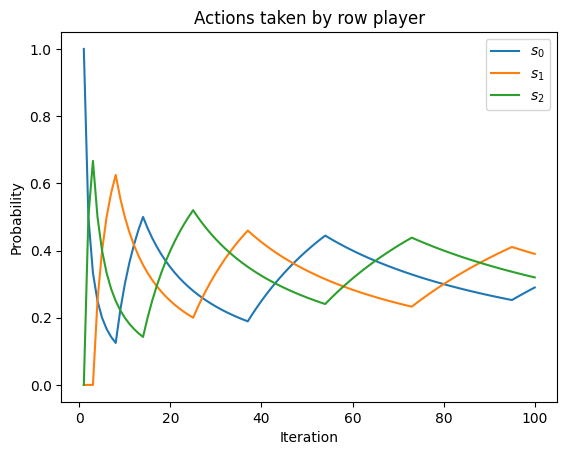

In [10]:
import matplotlib.pyplot as plt
plt.figure()
probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")
plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.title("Actions taken by row player")
plt.legend()

Lukijaa kehotetaan etsimään erilaisia tapauksia ja myös parametrien arvoja, joissa yllä oleva todennäköisyys lähestyy yhtä arvoa toistojen kasvaessa, sekä kääntäen tilanteita, joissa näin ei tapahdu.

Source and further reading:
* [Welcome to Nashpy’s documentation!](https://nashpy.readthedocs.io/en/stable/index.html):
   * [Tutorial: building and finding the equilibrium for a game](https://nashpy.readthedocs.io/en/stable/tutorial/index.html#introduction-to-game-theory)

In [11]:
import datetime
import pytz

tz = pytz.timezone('Europe/Helsinki')
print(f'Last modified {tz.localize(datetime.datetime.now()):%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2025-03-18 17:08 by Juha Nurmonen
